In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as scst
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.special import logit, expit

In [2]:
train_df = pd.read_csv('train_benchmark.csv')
test_df = pd.read_csv('test_benchmark.csv')

In [3]:
new_test_df = pd.concat([test_df[test_df['file_origin'] == '512_051015570'], \
                         test_df[test_df['file_origin'] == '512_051015571'], \
                         test_df[test_df['file_origin'] == '512_051015572'], \
                         test_df[test_df['file_origin'] == '512_130114570'], \
                         test_df[test_df['file_origin'] == '512_130114571'], \
                         test_df[test_df['file_origin'] == '512_130114572']])
new_test_df

,Unnamed: 0,1_156028951-156032951,19_838960-842960,19_35737922-35741922,19_41080891-41084891,4_185745070-185749070,16_75283369-75287369,fraction,file_origin
450,450,1.089253,1.250069,1.037599,0.248873,0.269718,0.699503,0.000,512_051015570
451,451,1.086535,1.249794,1.035817,0.249363,0.269641,0.697885,0.005,512_051015570
452,452,1.083806,1.249519,1.034025,0.249856,0.269564,0.696259,0.010,512_051015570
453,453,1.081064,1.249243,1.032220,0.250352,0.269487,0.694623,0.015,512_051015570
454,454,1.078309,1.248966,1.030405,0.250851,0.269409,0.692979,0.020,512_051015570
...,...,...,...,...,...,...,...,...,...
697,697,0.790787,1.171080,0.930378,0.403486,0.229104,0.559976,0.300,512_130114572
698,698,0.766478,1.208249,0.883794,0.413806,0.237465,0.532307,0.325,512_130114572
699,699,0.740663,1.246864,0.833704,0.424742,0.246240,0.502804,0.350,512_130114572
700,700,0.713198,1.287010,0.779696,0.436352,0.255461,0.471280,0.375,512_130114572


In [4]:
X_train = train_df.drop(['Unnamed: 0', 'fraction', 'file_origin'], axis = 1)
y_train = train_df['fraction']
X_test = new_test_df.drop(['Unnamed: 0', 'fraction', 'file_origin'], axis = 1)
y_test =  new_test_df['fraction']

In [17]:
y_train_t = logit(y_train + 0.05)
y_test_t = logit(y_test + 0.05)

In [18]:
parameters = {'alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]}
ls = Lasso()
grid_search = GridSearchCV(ls, parameters, scoring='neg_mean_absolute_error', cv=10, verbose=10)
grid_search.fit(X_train, y_train_t)
grid_search.best_params_

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START alpha=0.001...............................................
[CV 1/10; 1/10] END ...............alpha=0.001;, score=-0.504 total time=   0.0s
[CV 2/10; 1/10] START alpha=0.001...............................................
[CV 2/10; 1/10] END ...............alpha=0.001;, score=-0.292 total time=   0.0s
[CV 3/10; 1/10] START alpha=0.001...............................................
[CV 3/10; 1/10] END ...............alpha=0.001;, score=-0.324 total time=   0.0s
[CV 4/10; 1/10] START alpha=0.001...............................................
[CV 4/10; 1/10] END ...............alpha=0.001;, score=-0.332 total time=   0.0s
[CV 5/10; 1/10] START alpha=0.001...............................................
[CV 5/10; 1/10] END ...............alpha=0.001;, score=-0.528 total time=   0.0s
[CV 6/10; 1/10] START alpha=0.001...............................................
[CV 6/10; 1/10] END ...............alpha=0.001

[CV 3/10; 7/10] END ...............alpha=0.007;, score=-0.320 total time=   0.0s
[CV 4/10; 7/10] START alpha=0.007...............................................
[CV 4/10; 7/10] END ...............alpha=0.007;, score=-0.375 total time=   0.0s
[CV 5/10; 7/10] START alpha=0.007...............................................
[CV 5/10; 7/10] END ...............alpha=0.007;, score=-0.579 total time=   0.0s
[CV 6/10; 7/10] START alpha=0.007...............................................
[CV 6/10; 7/10] END ...............alpha=0.007;, score=-0.540 total time=   0.0s
[CV 7/10; 7/10] START alpha=0.007...............................................
[CV 7/10; 7/10] END ...............alpha=0.007;, score=-0.446 total time=   0.0s
[CV 8/10; 7/10] START alpha=0.007...............................................
[CV 8/10; 7/10] END ...............alpha=0.007;, score=-0.391 total time=   0.0s
[CV 9/10; 7/10] START alpha=0.007...............................................
[CV 9/10; 7/10] END ........

{'alpha': 0.003}

In [19]:
ls = Lasso(alpha = 0.003)
ls.fit(X_train, y_train_t)

Lasso(alpha=0.003)

In [20]:
ls.coef_

array([-0.81152533,  2.21593626, -1.74658509, -1.68409196,  3.44047266,
       -2.14555215])

In [21]:
y_pred_train = expit(ls.predict(X_train)) - 0.03
train_mae = mean_absolute_error(y_train, y_pred_train)
train_mae

0.06338953923050339

In [22]:
y_pred_test = expit(ls.predict(X_test)) - 0.03
test_mae = mean_absolute_error(y_test, y_pred_test)
test_mae

0.10472993692025642

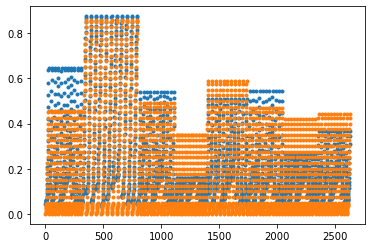

In [23]:
import matplotlib.pyplot as plt
plt.plot(y_pred_train,'.')
plt.plot(y_train, '.')

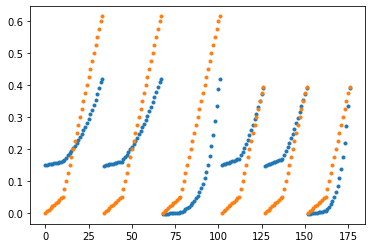

In [24]:
import matplotlib.pyplot as plt
plt.plot(y_pred_test,'.')
plt.plot(y_test.reset_index()['fraction'],'.')

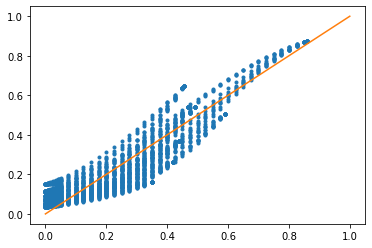

In [25]:
plt.plot(y_train, y_pred_train, '.')
plt.plot([0, 1], [0, 1])

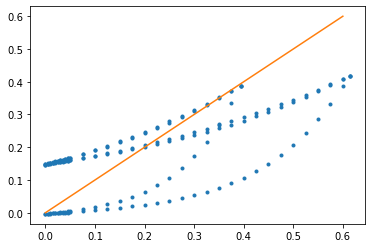

In [26]:
plt.plot(y_test, y_pred_test, '.')
plt.plot([0, 0.6], [0, 0.6])

In [28]:
scst.pearsonr(y_train, y_pred_train)

(0.923840533160407, 0.0)

In [29]:
scst.pearsonr(y_test, y_pred_test)

(0.7305008228148573, 8.469753241449708e-31)